<font color=Brown>
    
Name: N S Ramanujam Mangena

<font color=Blue>
    
We were given a dataset which states who availed loan from the previous campaign. Before we start with analyis, as an every data science project lets establish some basic understanding of the given problem statement.

Initial inference is just 9% of the members had availed loan. This suggests that data is highly inbalanced. Now our aim is to build a model to predict the number of people who had actually taken loan. Hence False negatives are vital for model performance. Hence we concentrate on recall to measure the model's performance.

More over this is a classification problem as our target column is Personal Loan which is categorical in nature. 1/0(True/False).


In [5]:
#import basic libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
%matplotlib inline
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings("ignore")

In [6]:
#Read csv
loan_df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
#Making copy
loan_df2 = loan_df.copy()

In [15]:
loan_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [16]:
loan_df.shape

(5000, 14)

In [17]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Suggests that there are no NaN values in the given dataset.

In [18]:
sum(loan_df.duplicated())

0

Suggests no duplicate entries and as data column legth is limited, we can clearly say that there are no duplicate/repeated columns.

In [19]:
loan_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Inference: No invalid values in the dataset and no missing datatypes suggests that given data has no missing info.

Five Point summary

In [20]:
loan_df.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Inference: We have both contineous and categotical columns in numarical in nature. Can notice very high standard deviation from Mortgage and highly skewed. Experience seems to have negative entries.

In [ ]:
loan_df[loan_df.Experience < 0].Experience.count()

Suggests 52 Negative values against Experience. It could be manual error!

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Univariate Analysis

<font color=Green>
    
    Its clear that below are contineous variables in given dataset. 
* Age
* Experiecnce
* Income
* CCAvg
* Mortgage

<font color=blue>
    
Rest of the values are categorical/binary in nature. Looking at the 5 point summary ZIP code and ID would not be much helpful in further building the model. One hot coding is not required as all columns are categorical in nature.
    
    We can perform Univariate analysis on these parameters.

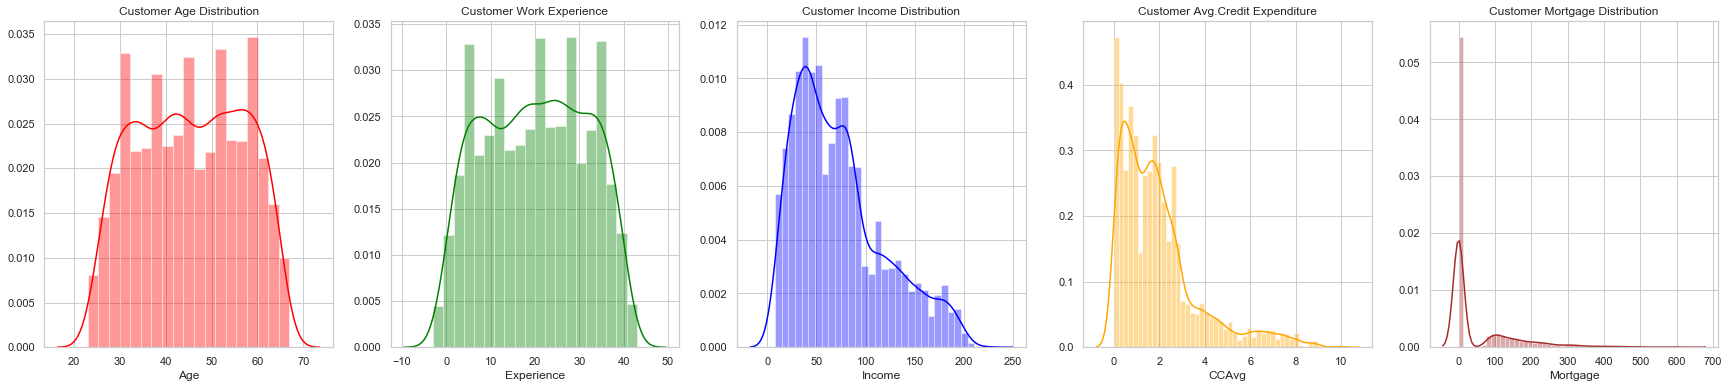

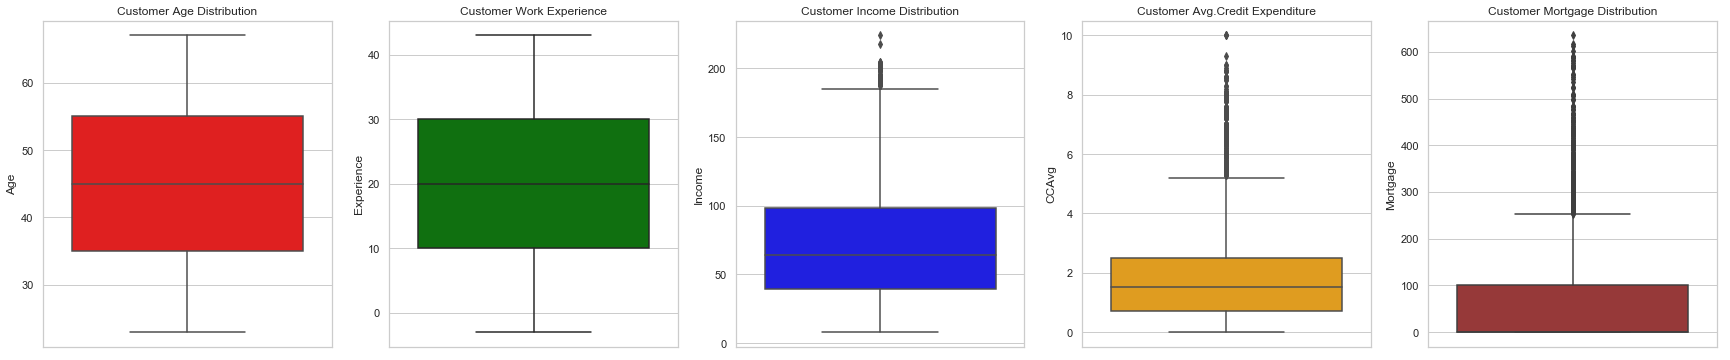

In [204]:

plt.figure(figsize=(30,6))

# subplot 1
plt.subplot(1, 5, 1)
plt.title('Customer Age Distribution')
sns.distplot(loan_df.Age,color='Red')

# subplot 2
plt.subplot(1, 5, 2)
plt.title('Customer Work Experience')
sns.distplot(loan_df.Experience,color='green')

# subplot 3l
plt.subplot(1, 5, 3)
plt.title('Customer Income Distribution')
sns.distplot(loan_df.Income,color='blue')

# subplot 4l
plt.subplot(1, 5, 4)
plt.title('Customer Avg.Credit Expenditure')
sns.distplot(loan_df.CCAvg,color='Orange')

# subplot 5l
plt.subplot(1, 5, 5)
plt.title('Customer Mortgage Distribution')
sns.distplot(loan_df.Mortgage,color='brown')


plt.figure(figsize=(30,6))

plt.subplot(1, 5, 1)
plt.title('Customer Age Distribution')
sns.boxplot(loan_df.Age,orient='vertical',color='red')

plt.subplot(1, 5, 2)
plt.title('Customer Work Experience')
sns.boxplot(loan_df.Experience,orient='vertical',color='green')

plt.subplot(1, 5, 3)
plt.title('Customer Income Distribution')
sns.boxplot(loan_df.Income,orient='vertical',color='blue')

plt.subplot(1, 5, 4)
plt.title('Customer Avg.Credit Expenditure')
sns.boxplot(loan_df.CCAvg,orient='vertical',color='Orange')

plt.subplot(1, 5, 5)
plt.title('Customer Mortgage Distribution')
sns.boxplot(loan_df.Mortgage,orient='vertical',color='brown')


<font color=Blue>
    
Alternatively, there is a pandas profling library which can be used to analyse each and every attribute in the given dataset.

In [2]:
# inbuilt library to analyse all columns
import pandas_profiling
from pandas_profiling import ProfileReport

In [7]:
ProfileReport(loan_df)

Number of variables,14
Number of observations,5000
Total Missing (%),0.0%
Total size in memory,547.0 KiB
Average record size in memory,112.0 B
Numeric,8
Categorical,0
Boolean,5
Date,0
Text (Unique),0
Rejected,1


##### Inferences:
* Below inferences obtained from pandas profiling aswell. 


<font color=Green>
    
1. Age : Given data have majority of customers aged between 30-60 years with median of 45 years.
2. Experiecnce : Looking at the data suggests that there are some negative experiences which seems to be referring to students/prior to professional experience whose data was collected as part of survey. None of these members were issued loans in the previous campaign. We can either consider absolute values or mark these as 0 as ther shouldnt be any negative experiences. And as Age and experience have very high correlation (ρ = 0.99421), we can ignore this column for better model build.
3. Income: Income distribution is highly right skewed with the mean of the population earning USD 64,000. Data has some outliers.
4. CCAvg Average credit card spending is USD 1,900. Data suggests that distribution is right skewed with high number of outliers. CCAvg has 2.1% zeros in given dataset.
* Mortgage: Majority of the given population dont have Mortgage and have very high number of outliers.
* We would be working on removing outliers of Mortgage which can impact on model performance. Again it has higest amount of zeros (69.2%).
7. Zipcode as well doesnt seem to add any additional value to the model building with more than 400 unique values.
8. ID is just an identification number which is not required as well.
9. Only 10.4%, 6% hold security accounts, CD accounts respectively.
10. 59.7% hold Online accounts.
11. Our target column/Personal Loan was availed by just 9.6% in the given data set.Target columns.
12. 29.4% hold CreditCard.


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Bivariate Analysis

<font color=Green>
    

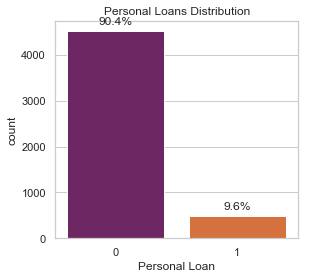

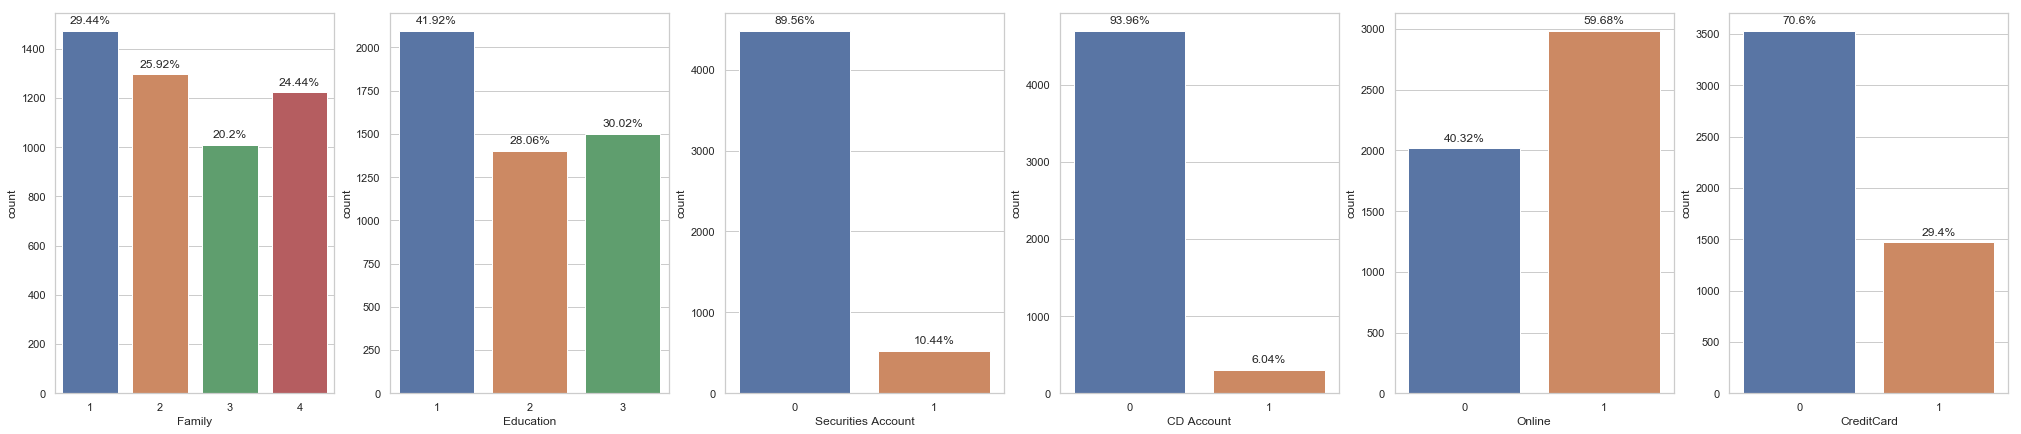

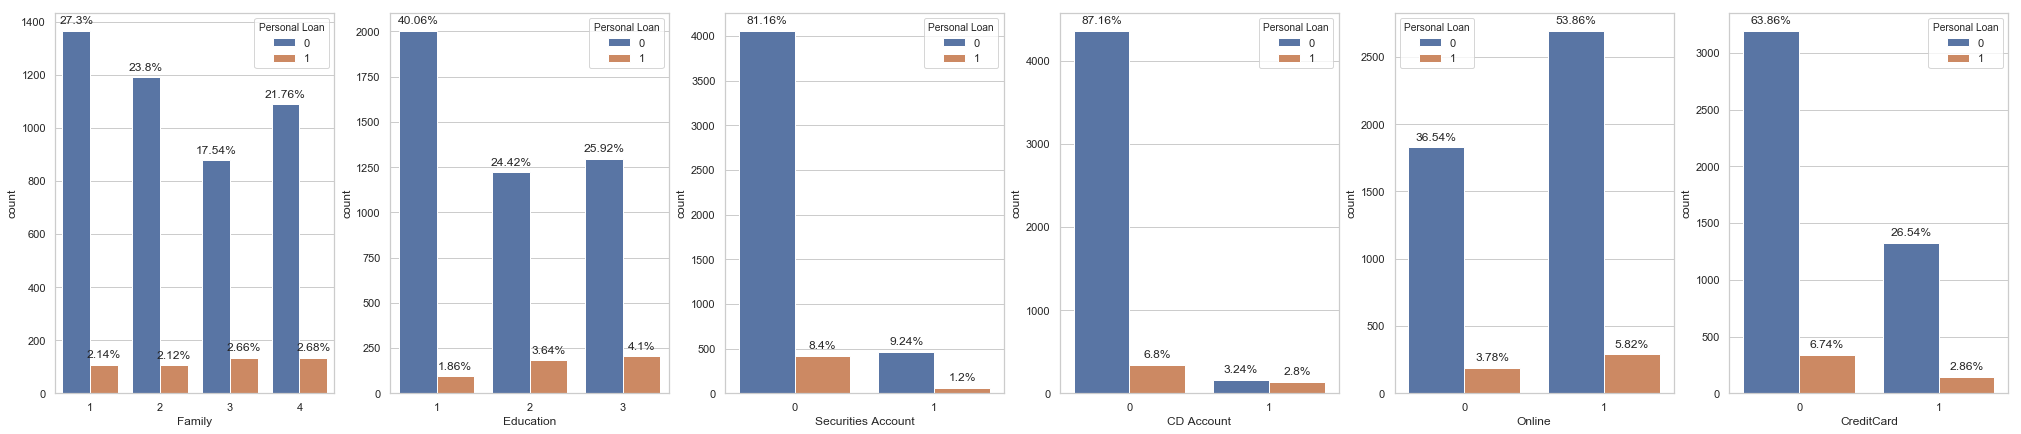

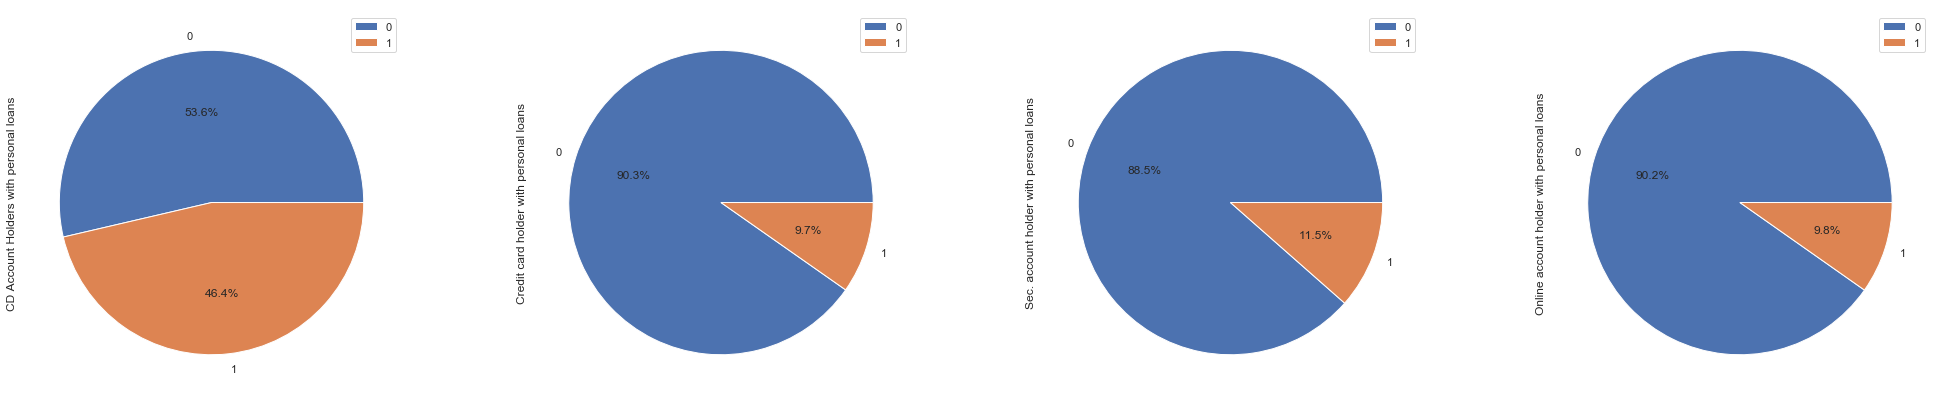

In [21]:
#fig, ax = plt.subplots(figsize=(20,8))
#width = len(loan_df['Family'].unique())+5
#fig.set_size_inches(width , 8)

plt.figure(figsize=(20,4))
plt.subplot(1, 4, 1)
plt.title('Personal Loans Distribution')
ax=sns.countplot(data = loan_df, x= 'Personal Loan',palette='inferno') 
for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(loan_df)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.figure(figsize=(35,7))
plt.subplot(1, 6, 1)
ax=sns.countplot(data = loan_df, x= 'Family') 
for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(loan_df)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.subplot(1, 6, 2)
ax=sns.countplot(data = loan_df, x= 'Education')

for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(loan_df)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
#plt.subplot(1, 7, 3)
#ax=sns.countplot(data = loan_df, x= 'Personal Loan',hue = 'Personal Loan')

#for p in ax.patches: 
#    ax.annotate(str((np.round(p.get_height()/len(loan_df)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.subplot(1, 6, 3)
ax=sns.countplot(data = loan_df, x= 'Securities Account')

for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(loan_df)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.subplot(1, 6, 4)
ax=sns.countplot(data = loan_df, x= 'CD Account')

for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(loan_df)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.subplot(1, 6, 5)
ax=sns.countplot(data = loan_df, x= 'Online')

for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(loan_df)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.subplot(1, 6, 6)
ax=sns.countplot(data = loan_df, x= 'CreditCard')

for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(loan_df)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.figure(figsize=(35,7))

plt.subplot(1, 6, 1)
ax=sns.countplot(data = loan_df, x= 'Family',hue = 'Personal Loan') 
for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(loan_df)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.subplot(1, 6, 2)
ax=sns.countplot(data = loan_df, x= 'Education',hue = 'Personal Loan')

for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(loan_df)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
#plt.subplot(1, 7, 3)
#ax=sns.countplot(data = loan_df, x= 'Personal Loan',hue = 'Personal Loan')

#for p in ax.patches: 
#    ax.annotate(str((np.round(p.get_height()/len(loan_df)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.subplot(1, 6, 3)
ax=sns.countplot(data = loan_df, x= 'Securities Account',hue = 'Personal Loan')

for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(loan_df)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.subplot(1, 6, 4)
ax=sns.countplot(data = loan_df, x= 'CD Account',hue = 'Personal Loan')

for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(loan_df)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.subplot(1, 6, 5)
ax=sns.countplot(data = loan_df, x= 'Online',hue = 'Personal Loan')

for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(loan_df)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.subplot(1, 6, 6)
ax=sns.countplot(data = loan_df, x= 'CreditCard',hue = 'Personal Loan')

for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(loan_df)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(35,7))  
    # plot chart
CD_cross =pd.crosstab(loan_df['CD Account'],loan_df['Personal Loan'])
CD_cross_per = CD_cross.divide(CD_cross.sum(1),axis = 0)
CD_cross_per = CD_cross_per[1:2].T
CD_cross_per.plot(kind = 'pie', y = 1,ax = ax1, autopct='%1.1f%%',label = 'CD Account Holders with personal loans')

Credit_cross =pd.crosstab(loan_df['CreditCard'],loan_df['Personal Loan'])
Credit_cross_per = Credit_cross.divide(Credit_cross.sum(1),axis = 0)
Credit_cross_per
Credit_cross_per = Credit_cross_per[1:2].T
Credit_cross_per.plot(kind = 'pie', y = 1,ax = ax2, autopct='%1.1f%%',label = 'Credit card holder with personal loans')

Sec_cross =pd.crosstab(loan_df['Securities Account'],loan_df['Personal Loan'])
Sec_cross_per = Sec_cross.divide(Sec_cross.sum(1),axis = 0)
Sec_cross_per
Sec_cross_per = Sec_cross_per[1:2].T
Sec_cross_per.plot(kind = 'pie', y = 1,ax = ax3, autopct='%1.1f%%',label = 'Sec. account holder with personal loans')

Online_cross =pd.crosstab(loan_df['Online'],loan_df['Personal Loan'])
Online_cross_per = Online_cross.divide(Online_cross.sum(1),axis = 0)
Online_cross_per
Online_cross_per = Online_cross_per[1:2].T
Online_cross_per.plot(kind = 'pie', y = 1,ax = ax4, autopct='%1.1f%%',label = 'Online account holder with personal loans')


##### Inferences:

<font color= Green>

    Below are some of the take aways from the sample data on the perople who had availed personal loan.
1. Members with more family members had availed the personal loan.
2. Members who are more educated had availed personal loan.
3. People who availed CD account higher proportion of personal loans. (~46%)
4. There doesnt seem to be much significant proportion of people with Security or Online or Credit card and availed a Personal loan. <br>

    Further inferences to be followed.


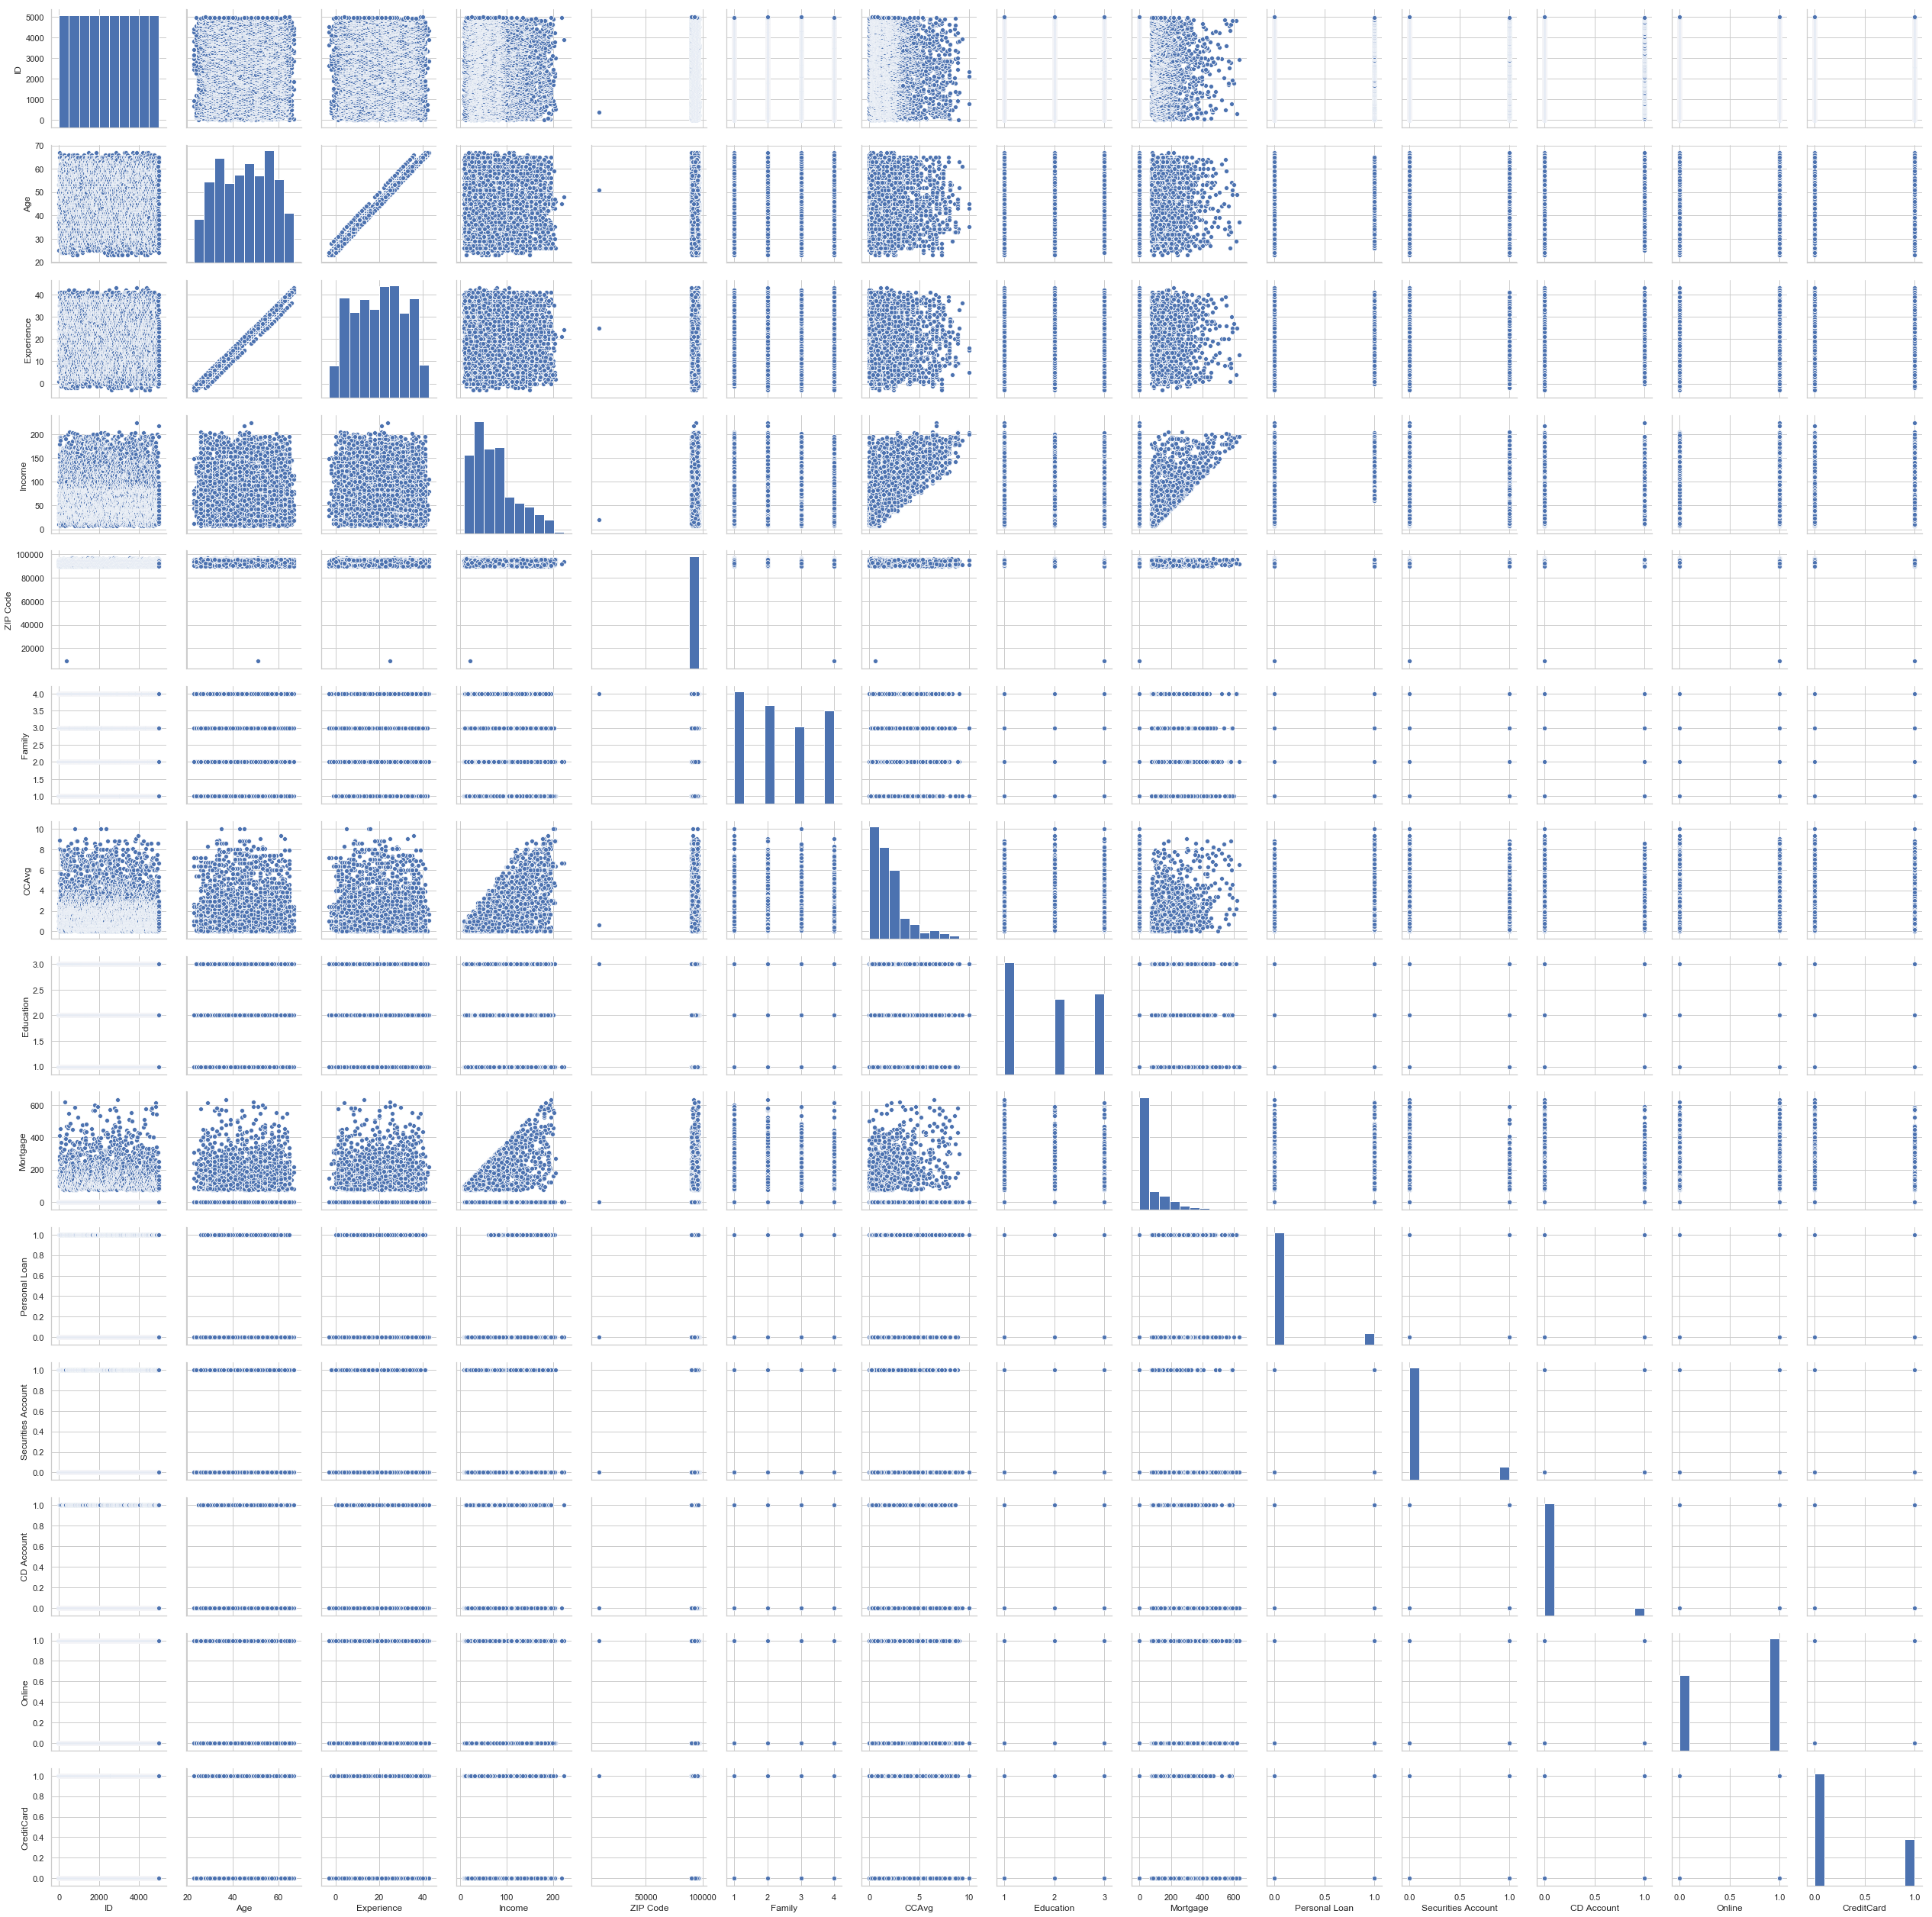

In [9]:
# Pairplot using sns
sns.pairplot(loan_df)

In [11]:
# correlation on the given dataset
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = loan_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1,-0.00847259,-0.00832576,-0.0176947,0.0134315,-0.0167972,-0.0246752,0.0214632,-0.0139199,-0.0248012,-0.0169723,-0.0069094,-0.00252841,0.0170282
Age,-0.00847259,1,0.994215,-0.0552686,-0.0292163,-0.0464177,-0.0520122,0.0413344,-0.0125386,-0.00772562,-0.000436242,0.00804255,0.0137024,0.00768104
Experience,-0.00832576,0.994215,1,-0.0465742,-0.0286255,-0.0525631,-0.0500765,0.0131518,-0.0105816,-0.0074131,-0.00123213,0.0103533,0.0138979,0.00896745
Income,-0.0176947,-0.0552686,-0.0465742,1,-0.0164098,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.0026165,0.169738,0.0142059,-0.00238501
ZIP Code,0.0134315,-0.0292163,-0.0286255,-0.0164098,1,0.0117782,-0.00406068,-0.0173768,0.00738338,0.000107376,0.00470424,0.0199719,0.0169901,0.00769139
Family,-0.0167972,-0.0464177,-0.0525631,-0.157501,0.0117782,1,-0.109275,0.0649289,-0.0204449,0.061367,0.0199941,0.0141104,0.010354,0.0115881
CCAvg,-0.0246752,-0.0520122,-0.0500765,0.645984,-0.00406068,-0.109275,1,-0.136124,0.109905,0.366889,0.0150863,0.136534,-0.00361101,-0.00668949
Education,0.0214632,0.0413344,0.0131518,-0.187524,-0.0173768,0.0649289,-0.136124,1,-0.0333271,0.136722,-0.010812,0.0139339,-0.0150038,-0.0110141
Mortgage,-0.0139199,-0.0125386,-0.0105816,0.206806,0.00738338,-0.0204449,0.109905,-0.0333271,1,0.142095,-0.00541097,0.0893111,-0.0059949,-0.00723092
Personal Loan,-0.0248012,-0.00772562,-0.0074131,0.502462,0.000107376,0.061367,0.366889,0.136722,0.142095,1,0.0219539,0.316355,0.00627782,0.00280151


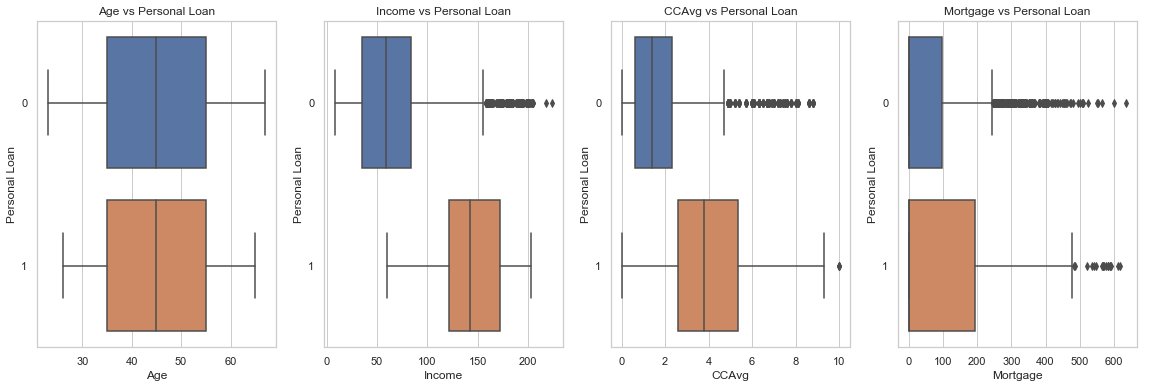

In [34]:
plt.figure(figsize=(30, 6))
plt.subplot(1,6,1)
#sns.jointplot(x = 'Income', y = 'CCAvg', data = loan_df,kind = 'kde')
#plt.subplot(1,4,2)
plt.title('Age vs Personal Loan')
sns.boxplot(x = 'Age', y = 'Personal Loan',orient="horizontal",data = loan_df)
plt.subplot(1,6,2)
plt.title('Income vs Personal Loan')
sns.boxplot(x = 'Income', y = 'Personal Loan',orient="horizontal", data = loan_df)
plt.subplot(1,6,3)
plt.title('CCAvg vs Personal Loan')
sns.boxplot(x = 'CCAvg', y = 'Personal Loan',orient="horizontal", data = loan_df)
plt.subplot(1,6,4)
plt.title('Mortgage vs Personal Loan')
sns.boxplot(x = 'Mortgage', y = 'Personal Loan',orient="horizontal", data = loan_df)



##### Inferences:

<font color= Green>
    
5. Age doesnt show sginificance difference with who availed Personal loan.
6. People with higher income have availed personal loan.
7. People with highers credit card spending have availed more personal loans.
8. Above matrix shows that we have very high corelation between Age and experience which might impact if we consider both parameters for model building. Morever we observed that there were some negative entries with experience. Hence we can consider dropping this column from dataframe.

#### Normalizing the Data

* Outliers <br>

Trying to remove the outliers of mortgage with IQR is not helpful as its removing the valid data. 
Hence some of the outliers are reduced with z score and beyond threshold of 3. We would be removing 105 rows with is close to 2% which is with in permissable limits. Morever we are not worried about CCAvg outliers as current dataset is highly unbalanced and further removing data would impact the predictability of the model.

In [3]:
#import z statistic library
from scipy import stats

loan_df['Mort_z'] = np.abs(stats.zscore(loan_df.Mortgage))
loan_df=loan_df[loan_df.Mort_z <3]

* Remove unwanted columns <br>
 Based on the above inferences we are dropping the unwanted columns

In [4]:
loan_df.drop('Experience', axis = 1, inplace=True)
loan_df.drop('ID', axis = 1, inplace=True)
loan_df.drop('ZIP Code', axis = 1, inplace=True)
loan_df.drop('Mort_z', axis = 1, inplace=True)

In [5]:
loan_df.shape

(4895, 11)

In [148]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = loan_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1,-0.057196,-0.0461629,-0.0514223,0.0436054,-0.0120741,-0.0102519,0.0011036,0.00867286,0.01637,0.0088978
Income,-0.057196,1,-0.157465,0.648158,-0.185354,0.0666381,0.492443,-0.000110998,0.157302,0.0147144,0.00101881
Family,-0.0461629,-0.157465,1,-0.109337,0.0593445,-0.00437487,0.0526291,0.0213681,0.010479,0.0105876,0.00835735
CCAvg,-0.0514223,0.648158,-0.109337,1,-0.140421,0.0263414,0.358538,0.0160756,0.125942,-0.000723892,-0.0107505
Education,0.0436054,-0.185354,0.0593445,-0.140421,1,-0.00784983,0.130054,-0.0131171,0.00182059,-0.0180146,-0.0173854
Mortgage,-0.0120741,0.0666381,-0.00437487,0.0263414,-0.00784983,1,0.0471032,-0.00584979,0.0518269,-0.0109957,0.000472167
Personal Loan,-0.0102519,0.492443,0.0526291,0.358538,0.130054,0.0471032,1,0.0207009,0.296584,0.00396497,-0.00259457
Securities Account,0.0011036,-0.000110998,0.0213681,0.0160756,-0.0131171,-0.00584979,0.0207009,1,0.317025,0.0124946,-0.0155883
CD Account,0.00867286,0.157302,0.010479,0.125942,0.00182059,0.0518269,0.296584,0.317025,1,0.172959,0.27473
Online,0.01637,0.0147144,0.0105876,-0.000723892,-0.0180146,-0.0109957,0.00396497,0.0124946,0.172959,1,0.00201969


From Above revised correlation matrix, its evident that Personal loan is correlated in below descending order. 

<font color=Green>
    
* Income
* CCAvg
* CD Account
* Education
* Family
* Mortgage
* Securities Account

<font color=Red>
    
* Online (Loosely correlated)
* CreditCard (Not correlated )
* Age (Not correlated ) 
Lets try to build the model with all positively corelated data and try adding the the additional columns later.

#### Split Target columns and Independendent columns 
Removing the loosely and non correlated columns to build the model.

In [6]:
#Train and Test data split library import
from sklearn.model_selection import train_test_split 

In [7]:
X = loan_df.drop(['Personal Loan','CreditCard','Age','Online'],axis=1) # independant variables
#X = loan_df.drop(['Personal Loan'],axis=1)
y = loan_df['Personal Loan'] #Dependant variables

<font color=blue>
    
Split Data to 70:30 Train and Test ratio

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [9]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(loan_df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(loan_df.index)) * 100))

69.99% data is in training set
30.01% data is in test set


In [28]:
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(loan_df.loc[loan_df['Personal Loan'] == 1]), (len(loan_df.loc[loan_df['Personal Loan'] == 1])/len(loan_df.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(loan_df.loc[loan_df['Personal Loan'] == 0]), (len(loan_df.loc[loan_df['Personal Loan'] == 0])/len(loan_df.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan True Values    : 433 (8.85%)
Original Personal Loan False Values   : 4462 (91.15%)

Training Personal Loan True Values    : 306 (8.93%)
Training Personal Loan False Values   : 3120 (91.07%)

Test Personal Loan True Values        : 127 (8.65%)
Test Personal Loan False Values       : 1342 (91.35%)



### Lets predict using models!!

<font color=Red>
    
#### Logistic Regression

In [12]:
#Import required metrics libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#Logistic regression model import
from sklearn.linear_model import LogisticRegression

#importing cross validation and Grid search library
from sklearn.model_selection import GridSearchCV


Hyper tuning parameters with the help of GridsearchCV

In [35]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
model=LogisticRegression(max_iter=5000)
model_cv=GridSearchCV(model,grid,cv=10)
model_cv.fit(X_train,y_train)

print("Tuned hpyerparameters :(best parameters) ",model_cv.best_params_)
print("Accuracy :",model_cv.best_score_)

Tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
Accuracy : 0.9512497229468229


In [32]:
# Fit the model with the help of hyper parameters

model2=LogisticRegression(C=1.0,penalty="l2")
model2.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
#predict on test
y_pred = model2.predict(X_test)

print('\033[91m' + "Logistic Regression Stats" + '\033[0m')
print(classification_report(y_test,y_pred))
print("Recall : ",round(recall_score(y_test,y_pred),2))
print("Accuracy : ",round(accuracy_score(y_test,y_pred),2))
print("Precision : ",round(precision_score(y_test,y_pred),2))

print('\033[91m' + "Logistic Regression Confusion Matrix" + '\033[0m')
#print(confusion_matrix(y_test,y_pred))
mcm=confusion_matrix(y_test, y_pred, labels=[1, 0])

log_df_cm = pd.DataFrame(mcm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
log_df_cm

#coef_df = pd.DataFrame(model.coef_)
#coef_df['intercept'] = model.intercept_
#print(coef_df)

Logistic Regression Stats
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1342
           1       0.75      0.51      0.61       127

    accuracy                           0.94      1469
   macro avg       0.85      0.75      0.79      1469
weighted avg       0.94      0.94      0.94      1469

Recall :  0.51
Accuracy :  0.94
Precision :  0.75
Logistic Regression Confusion Matrix


,Predict 1,Predict 0
1,65,62
0,22,1320


ROC/AUC Curve

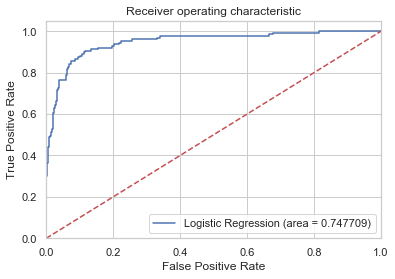

In [101]:
log_roc_auc = roc_auc_score(y_test, model2.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %02f)' % log_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Inferences:
Model has a very high accuracy score. However, we need to remember that this is highly unbalanced data set. Hence Type II/False negatives play a major role in understanding models performance. In this case 62 is the Type II error.

<font color=Red>
    
#### Naive Bayes

In [36]:
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB

In [37]:
clf = GaussianNB()
NB_result = clf.fit(X_train, y_train)
clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [97]:
y_pred = clf.predict(X_test)

print('\033[91m' + "Naive Bayes Stats" + '\033[0m')
print(classification_report(y_test,y_pred))
print("Recall : ",round(recall_score(y_test,y_pred),2))
print("Accuracy : ",round(accuracy_score(y_test,y_pred),2))
print("Precision : ",round(precision_score(y_test,y_pred),2))

print('\033[91m' + "Naive Bayes Confusion Matrix" + '\033[0m')
#print(confusion_matrix(y_test,y_pred))
nv_mcm=confusion_matrix(y_test, y_pred, labels=[1, 0])

nv_df_cm = pd.DataFrame(nv_mcm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
nv_df_cm

Naive Bayes Stats
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1342
           1       0.40      0.48      0.43       127

    accuracy                           0.89      1469
   macro avg       0.67      0.71      0.69      1469
weighted avg       0.90      0.89      0.90      1469

Recall :  0.48
Accuracy :  0.89
Precision :  0.4
Naive Bayes Confusion Matrix


,Predict 1,Predict 0
1,61,66
0,93,1249


ROC/AUC Curve

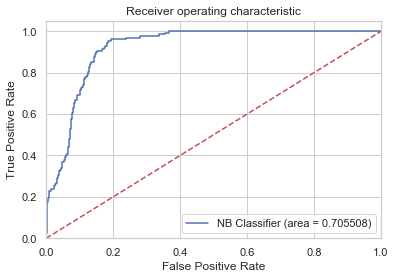

In [39]:
NB_roc_auc = roc_auc_score(y_test,clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NB Classifier (area = %2f)' % NB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

<font color=Red>
    
#### KNN-Classification
<font color=black>
    
With KNN we deal with neighbouring data points. There is no specific criteria to choose the K value. Generally we start with neighbours of 3,5,7 etc., However when calculate accuracy score is reducing when calculated with 5 and 7. Hence we have confined to the test with k = 3.

In [40]:
# loading library
from sklearn.neighbors import KNeighborsClassifier

In [66]:
# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors = 3)

# fitting the model
knn.fit(X_train, y_train)
# predict the response
y_pred = knn.predict(X_test)


In [100]:
print('\033[91m' + "KNN Stats" + '\033[0m')
print(classification_report(y_test,y_pred))
print("Recall : ",round(recall_score(y_test,y_pred),2))
print("Accuracy : ",round(accuracy_score(y_test,y_pred),2))
print("Precision : ",round(precision_score(y_test,y_pred),2))

print('\033[91m' + "KNN Confusion Matrix" + '\033[0m')
#print(confusion_matrix(y_test,y_pred))
knn_mcm=confusion_matrix(y_test, y_pred, labels=[1, 0])

knn_df_cm = pd.DataFrame(knn_mcm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
knn_df_cm

KNN Stats
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1342
           1       0.75      0.51      0.61       127

    accuracy                           0.94      1469
   macro avg       0.85      0.75      0.79      1469
weighted avg       0.94      0.94      0.94      1469

Recall :  0.51
Accuracy :  0.94
Precision :  0.75
KNN Confusion Matrix


,Predict 1,Predict 0
1,65,62
0,22,1320


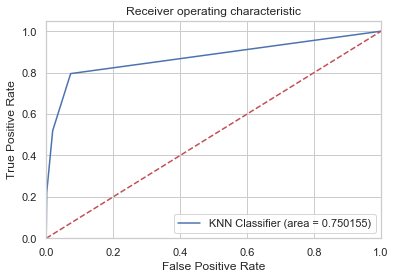

In [58]:
KNN_roc_auc = roc_auc_score(y_test,knn.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN Classifier (area = %2f)' % KNN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

<font color=Red>
    
### Conclusions:

   Out of all models KNN seems to perform better in reducing the False Negatives which we established at the beginning of the analysis as key factor to determine the model performance.

   Though acuracy score of Logistic regression is quiet high, this model is a kind of linear mode which would have less performance. Naive Bays is a good model to predict the text based models. however in our dataset we have all numarical attributes.

* Based on ROC/AUC curve below is the order of model performance based on False Negatives and Recall values.

<font color=Blue>
    
 KNN(Recall = 0.52) > Logistic regression (Recall = .51) > Naive Bays (Recall = 0.48)  

However there is still scope in improving this model by using decision tress and Random forest and so on.